## Исследование данных о российском кинопрокате



Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю. 

Пути к датасетам:

/datasets/mkrf_movies.csv — данные о прокатных удостоверениях. 

/datasets/mkrf_shows.csv — данные о прокате в российских кинотеатрах. 

Столбцы в данных:

mkrf_movies:

- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

mkrf_shows:

- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
pd.set_option('display.float_format', '{:,.2f}'.format)

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Загрузили данные

In [ ]:
mkrf_movies = pd.read_csv("./mkrf_movies.csv")
mkrf_shows = pd.read_csv("./mkrf_shows.csv")

Размер датасетов

In [3]:
print(len(mkrf_movies), len(mkrf_shows))

7486 3158


In [4]:
mkrf_movies.head(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [5]:
mkrf_shows.head(15)

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
5,111000119,"4,293,649.51"
6,111000212,200.00
7,111000216,"355,567.00"
8,111000313,710.00
9,111000314,"1,607,970.00"


In [6]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [7]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Хотим объединить по столбцу puNumber, но он имеет разные типы, приведём к типу int64

В столбце 'puNumber' таблицы mkrf_movies есть одно значение 'нет'

In [8]:
series1 = mkrf_movies['puNumber']
list1 = []
list1_bad = []
for el1 in series1:
    try:
        new_el = int(el1)
        list1.append(new_el)
    except:
        list1_bad.append(el1)
print(list1_bad)

['нет']


Удалим его

In [9]:
mkrf_movies = mkrf_movies[~(mkrf_movies['puNumber'] == 'нет')]

In [10]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

In [11]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Видим, что тип изменился

Теперь объединим таблицы по столбцу 'puNumber' в качестве ключа. При объединении все объекты из датафрема mkrf_movies обязательно должны войти в получившийся датафрейм, поэтому указываем параметр how='left', т.е. ключи берутся из левого датасета и ищутся подходящие в правом.

In [12]:
data = pd.merge(mkrf_movies, mkrf_shows, how='left', on='puNumber')

Длина датафрейма data равна длине датафрейма mkrf_movies, как и задумано

In [13]:
print(len(data))

7485


Столбец box_office заполнен

In [14]:
print(len(list(data['box_office'].unique())))

2939


Вывод data

In [15]:
data.tail(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20T12:00:00.000Z,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",0.00,"190,000,000.00",Фонд кино,6.7,"мультфильм,приключения,семейный","501,069,235.00"
7466,Жёлтый клевер,111022219,2019-12-27T12:00:00.000Z,Художественный,Соломатина Людмила Леонидовна,Россия,Л.Соломатина (Томилова),Л.Соломатина (Томилова),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7467,Унесенные ветром,121038119,2019-12-16T12:00:00.000Z,Художественный,"Селзник Интернэшнл Пикчерз, Метро Голдвин Майер",США,Виктор Флеминг,Дэвид О.Селзник,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.4,"мелодрама,история,драма",NaN
7468,Нотр-Дам,121037919,2019-12-19T12:00:00.000Z,Художественный,"Ректангль Продюксьон, Франс 2 Синема, Скоуп Пи...","Франция, Бельгия",Валери Донзелли,"Алис Жерар, Эдуард Вейл",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.8,"мультфильм,мюзикл,драма",NaN
7469,Дикие и свободные,112004819,2019-12-23T12:00:00.000Z,Документальный,"АНО ""ТВ-Новости""",Россия,Н.Карачкова,В.Сенина,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7470,Реальная любовь в Нью-Йорке,121038219,2019-12-19T12:00:00.000Z,Художественный,"Креатив Энлэйнс, Арт, Копенгаген Филм, Дет Дан...",Дания - Канада - Швеция - Франция - Германия -...,Лоне Шерфиг,"Малене Бленков, Сандра Каннингэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,драма,"3,143,790.50"
7471,Черное Рождество,121038319,2019-12-19T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Блюмхауз Продакшнз, Дивид/К...",США - Новая Зеландия,Софи Такал,Джесси Хендерсон,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,3.9,"ужасы,триллер,детектив","18,001,772.43"
7472,Ходячий замок,124010519,2019-12-19T12:00:00.000Z,Анимационный,"Студио Гибли, Буена Виста Хоум Интертейнмент, ...",Япония,Хаяо Миядзаки,"Томохико Исии, Хаяо Миядзаки, Тосио Судзуки",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.3,"аниме,мультфильм,фэнтези",NaN
7473,Вторжение,111022519,2019-12-23T12:00:00.000Z,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.7,"фантастика,боевик",NaN
7474,Папа,111022919,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",Россия,К.Чувикова,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.2,драма,NaN


Промежуточные выводы

Объединили два датафрейма по полю puNumber. При объединении указали параметр how='left', чтобы все строки из датасета mkrf_movies обязательно вошли в датафрейм.


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Разбор типов столбцов в таблице data

title - название фильма, тип object подходит

puNumber - фактически, это id, тип int64 подходит

show_start_date - тип object не подходит, нужно перевести в читаемые формат даты datetime

type - жанр фильма, тип object подходит

film_studio - студия производства фильма, тип object подходит

production_country - страна производства фильма, тип object подходит

director - ФИО режиссера, тип object подходит

producer - ФИО продюсера, тип object подходит

age_restriction - возрастной рейтинг фильма, тип object подходит, но возможно стоит разбить на 2 столбца - минимальный возраст типа int и описание возрастного рейтинга типа object (например, запрещено для детей)

refundable_support - объём возвратных средств государственной поддержки, это число, тип float64 подходит. Нужно изменить формат отображения.

nonrefundable_support - объём невозвратных средств государственной поддержки, число, тип float64 подходит. Нужно изменить формат отображения.

budget - общий бюджет фильма, это число, тип float64 подходит. Нужно изменить формат отображения.

financing_source - источник государственного финансирования, тип object подходит

ratings - рейтинг фильма на КиноПоиске, это число, тип object не подходит, нужно перевести в формат float64

genres - жанр фильма, тип object подходит

box_office - сборы в рублях, тип float64 подходит

Итого, необходимо выполнить следующие изменения типов столбцов:

show_start_date: object --> datetime64

age_restriction: object --> \[object, int, object\] (возрастной рейтинг, минимальный возраст, описание рейтинга)

ratings: object --> float64

Изменения формата отображения чисел float

In [16]:
pd.options.display.float_format = '{:,.1f}'.format

show_start_data: object --> datetime64

In [17]:
data['show_start_date'] = \
pd.to_datetime(data['show_start_date'], \
               utc=False, format='%Y-%m-%dT%H:%M:%S.%fZ')

age_restriction: object --> [object, int, object] (возрастной рейтинг, минимальный возраст, описание рейтинга)

Функции для получения минимального зрительского возраста и описания рейтинга по значению столбца age_restriction

In [18]:
def get_min_descr_age(row, mode):
    age_restriction = row['age_restriction']
    quote1 = age_restriction.find('«')
    quote2 = age_restriction.find('»')
    str1 = age_restriction[quote1+1:quote2-1]
    str2 = age_restriction[quote2+4:]
    if mode == 'min_age':
        return int(str1)
    if mode == 'age_description':
        return str2

In [19]:
data['min_age'] = data\
.apply(lambda x: get_min_descr_age(x, 'min_age'), axis=1)

In [20]:
data['age_description'] = data\
.apply(lambda x: get_min_descr_age(x, 'age_description'), axis=1)

Проверяем, что столбцы появились

In [21]:
data.tail(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,min_age,age_description
7470,Реальная любовь в Нью-Йорке,121038219,2019-12-19 12:00:00,Художественный,"Креатив Энлэйнс, Арт, Копенгаген Филм, Дет Дан...",Дания - Канада - Швеция - Франция - Германия -...,Лоне Шерфиг,"Малене Бленков, Сандра Каннингэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,драма,"3,143,790.5",16,для детей старше 16 лет
7471,Черное Рождество,121038319,2019-12-19 12:00:00,Художественный,"Юниверсал Пикчерз, Блюмхауз Продакшнз, Дивид/К...",США - Новая Зеландия,Софи Такал,Джесси Хендерсон,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,3.9,"ужасы,триллер,детектив","18,001,772.4",18,запрещено для детей
7472,Ходячий замок,124010519,2019-12-19 12:00:00,Анимационный,"Студио Гибли, Буена Виста Хоум Интертейнмент, ...",Япония,Хаяо Миядзаки,"Томохико Исии, Хаяо Миядзаки, Тосио Судзуки",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.3,"аниме,мультфильм,фэнтези",NaN,6,для детей старше 6 лет
7473,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.0","400,000,000.0","944,000,000.0",Фонд кино,5.7,"фантастика,боевик",NaN,12,для детей старше 12 лет
7474,Папа,111022919,2019-12-24 12:00:00,Художественный,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",Россия,К.Чувикова,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.2,драма,NaN,18,запрещено для детей
7475,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,"30,000,000.0","46,154,000.0",Министерство культуры,5.9,драма,NaN,12,для детей старше 12 лет
7476,Тридцать,121038419,2019-12-26 12:00:00,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,драма,NaN,16,для детей старше 16 лет
7477,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,"40,000,000.0","60,000,000.0","150,147,502.0",Фонд кино,4.5,"комедия,фантастика,мелодрама",NaN,12,для детей старше 12 лет
7478,Эколав,111023219,2019-12-26 12:00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,запрещено для детей
7479,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"219,569.0",12,для детей старше 12 лет


ratings: object --> float64

Уникальные значения

In [22]:
print(data['ratings'].unique())

['7.2' '6.6' '6.8' '7.7' '8.3' '8.0' '7.8' '8.1' '7.1' '6.0' '7.4' '5.8'
 '8.7' '6.3' '6.9' '5.0' '4.3' '7.3' '7.0' '6.4' nan '8.2' '7.5' '6.7'
 '7.9' '5.9' '6.2' '5.6' '6.5' '2.4' '7.6' '6.1' '8.6' '8.5' '8.8' '5.5'
 '5.1' '5.7' '5.4' '99%' '4.4' '4.5' '5.3' '4.1' '8.4' '2.6' '3.8' '4.6'
 '4.8' '4.0' '3.0' '1.6' '4.2' '5.2' '4.7' '4.9' '3.9' '2.7' '3.3' '2.9'
 '28%' '3.7' '1.4' '3.1' '97%' '3.5' '3.2' '2.8' '1.5' '2.1' '2.5' '9.2'
 '3.4' '1.1' '3.6' '83%' '64%' '91%' '94%' '62%' '79%' '90%' '19%' '88%'
 '1.0' '89%' '1.3' '1.9' '1.8' '1.2' '1.7' '9.0' '98%' '8.9' '9.1']


Переводим проценты в числа

In [23]:
def perc_to_number(row):
    stroka = str(row['ratings'])
    pos = stroka.find('%')
    if pos == -1:
        return stroka
    ans = stroka[:pos]
    if len(ans) > 1:
        ans = ans[:len(ans)-1] + '.' + ans[len(ans)-1:]
    else:
        ans = '0.' + ans
    return ans

In [24]:
data['ratings'] = data.apply(perc_to_number, axis=1)

Проверка, что значения в виде процентов заменились

In [25]:
print(data['ratings'].unique())

['7.2' '6.6' '6.8' '7.7' '8.3' '8.0' '7.8' '8.1' '7.1' '6.0' '7.4' '5.8'
 '8.7' '6.3' '6.9' '5.0' '4.3' '7.3' '7.0' '6.4' 'nan' '8.2' '7.5' '6.7'
 '7.9' '5.9' '6.2' '5.6' '6.5' '2.4' '7.6' '6.1' '8.6' '8.5' '8.8' '5.5'
 '5.1' '5.7' '5.4' '9.9' '4.4' '4.5' '5.3' '4.1' '8.4' '2.6' '3.8' '4.6'
 '4.8' '4.0' '3.0' '1.6' '4.2' '5.2' '4.7' '4.9' '3.9' '2.7' '3.3' '2.9'
 '2.8' '3.7' '1.4' '3.1' '9.7' '3.5' '3.2' '1.5' '2.1' '2.5' '9.2' '3.4'
 '1.1' '3.6' '9.1' '9.4' '9.0' '1.9' '1.0' '8.9' '1.3' '1.8' '1.2' '1.7'
 '9.8']


Изменяем тип

In [26]:
data['ratings'] = data['ratings'].astype('float64')

Проверяем, что типы изменились

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Пропуски в данных:
- producion_country - нечем заполнить пропуски
- director - невозможно определить режиссера
- producer - аналогично
- refundable_support, nonrefundable_support, budget, financing_source - нет никакой информации, заполнять средним нет смысла, т.к. мало данных. (Первые 2 можно заполнить нулями, но использовать такие данные мы не будет, это только сильно исказит среднее)
- genres - не знаем, чем заполнять
- box_office - кроме как в таблице у нас нет информации о доходах

В итоге пропуски не заполняем

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Число явных дубликатов

In [30]:
data.duplicated().sum()

0

Вывод числа уникальных значений и примеров значения для каждого из столбцов

In [31]:
for column in data.columns:
    print(column)
    print(len(list(data[column].unique())))
    if len(list(data[column].unique())) < 20:
        print(data[column].unique())
    else:
        print(data[column].unique()[0:20])

title
6771
['Открытый простор' 'Особо важное задание' 'Особо опасен'
 'Остановился поезд' 'Любовь и голуби' 'Любовь и сигареты'
 'Отпетые мошенники.' 'Отпуск за свой счет'
 'Превосходство Борна /По одноименной новелле Роберта Ладлэма/'
 'Ответный ход'
 'Малышка на миллион /По мотивам рассказов Ф.Х.Тула из сборника "Клейма от канатов"/'
 'Преданный садовник' 'Отель /По мотивам пьесы Джона Уэбстера/'
 'Председатель' 'Осенний марафон' 'Осень' 'Неподдающиеся' 'Неподсуден'
 'Незабываемый 1919-й год' 'Незаконченная жизнь']
puNumber
7483
[221048915 111013716 221038416 221026916 221030815 111013816 111007013
 221074614 121011416 111019114 221031416 111019014 221011415 121003106
 221008812 111014916 111007513 111027914 111003616 111003716]
show_start_date
1964
['2015-11-27T12:00:00.000000000' '2016-09-13T12:00:00.000000000'
 '2016-10-10T12:00:00.000000000' '2016-06-10T12:00:00.000000000'
 '2015-07-29T12:00:00.000000000' '2013-10-18T12:00:00.000000000'
 '2014-12-29T12:00:00.000000000' '2016-05-0

Выводы по уникальным значениям:
- Названий фильмов меньше, чем строк (видимо по нескольку записей об одном фильме, причиной может служить повторный прокат или ремейк фильма)
- Уникальный номер не уникален (видимо по той же причине)
- В столбце тип фильма есть неявные дубликаты (человеческий фактор)
- В столбце студия производства могут быть неявные дубликаты (нужно получить список названий студий и сравнить, затем перезаписать в алфавитном порядке, причина - человеческий фактор при заполнении данных)
- В столбце страна производства скорее всего есть неявные дубликаты, т.к. перечисление происходит как через запятую, так и через тире. (формируем список по строке, перезаписываем в алфавитном порядке с однообразными разделителями, причина - человеческий фактор и отсутствие норм формирования подобных данных)
- В столбце режиссер так же могут быть неявные дубликаты, связанные с сокращениями (можем пробовать сокращать имена, причины - как и у предыдущих столбцов)
- Столбец продюсер - так же, как и предыдущий
- В столбце жанра также могут быть неявные дубликаты, связанные с разделителями

Посмотрим на дубликаты прокатного номера

In [32]:
data['puNumber'].value_counts()

221054410    2
221154310    2
122001411    1
111008518    1
114002716    1
            ..
221015415    1
121021814    1
224028210    1
121013618    1
126002916    1
Name: puNumber, Length: 7483, dtype: int64

In [33]:
data[(data['puNumber'] == 221054410) | (data['puNumber'] == 221154310)].head(4)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,min_age,age_description
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN,16,для детей старше 16 лет
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN,16,для детей старше 16 лет
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN,16,для детей старше 16 лет
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN,12,для детей старше 12 лет


Под номером 221154310 находятся 2 разных фильма, что довольно странно. Такие данные лучше удалить.

Под номером 221054410 находится один и тот же фильм, но с небольшими изменениями информации о фильме.

Удаляем их

In [34]:
data = data[~((data['puNumber'] == 221154310) | (data['puNumber'] == 221054410))]
print(len(data['puNumber']))
print(len(data['puNumber'].unique()))

7481
7481


Неявные дубликаты в названиях фильмов удалять не будем, т.к. это:
- Очень сложно (к названию можно добавить или не добавлять пьесу, по которой снят фильм)
- Имеет не очень много смысла, т.к. это в любом случае разные прокаты одних и тех же фильмов

Создаём столбцец со списком студий

In [35]:
def get_studio_list(row):
    film_studio = str(row['film_studio'])
    studio_list = re.split(r'[,-]+', film_studio)
    for i, studio in enumerate(studio_list):
        studio_list[i] = studio.strip()
    ans = studio_list
    return ans

In [36]:
data['studio_list'] = data.apply(get_studio_list, axis=1)

Создаём столбец со списком стран производства

In [37]:
def get_country_list(row):
    film_country = str(row['production_country'])
    country_list = re.split(r'[,-]', film_country)
    for i, country in enumerate(country_list):
        country_list[i] = country.strip()
    ans = country_list
    return ans

In [38]:
data['country_list'] = data.apply(get_country_list, axis=1)

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Удаляем неявные дубликаты в столбце тип фильма

'Художественный'

'Анимационный' 

'Прочие' 

'Документальный' 

'Научно-популярный' 

' Художественный' 

' Анимационный' 

'Музыкально-развлекательный'

Типы Художественный и Анимационный фигурируют с пробелом в начале и без него

In [39]:
data['type'] = data['type'].str.strip()

Проверка

In [40]:
print(data['type'].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']


Удалим пробелы в начале строки и для других категориальных столбцов

In [41]:
categorial_columns = ['title', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'financing_source', 'genres',
       'age_description']
for column in categorial_columns:
    data[column] = data[column].str.strip()

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [42]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,min_age
count,"7,481.0",332.0,332.0,332.0,"6,515.0","3,158.0","7,481.0"
mean,"135,150,653.7","11,864,457.8","48,980,988.9","127,229,716.7",6.5,"76,478,696.2",13.0
std,"38,311,673.3","24,916,555.3","59,980,117.9","188,588,333.1",1.1,"240,353,122.8",5.6
min,"1,811,096.0",0.0,0.0,0.0,1.0,0.0,0.0
25%,"112,025,018.0",0.0,"25,000,000.0","42,000,000.0",5.9,"86,239.0",12.0
50%,"121,015,418.0",0.0,"30,000,000.0","68,649,916.0",6.6,"2,327,987.5",16.0
75%,"124,003,219.0","15,000,000.0","40,375,000.0","141,985,319.5",7.2,"23,979,671.0",16.0
max,"231,001,111.0","180,000,000.0","400,000,000.0","2,305,074,303.0",9.9,"3,073,568,690.8",18.0


Построим гистограмму распределения значений для каждого столбца с количественными значениями

In [43]:
numerical_columns = ['puNumber', 'show_start_date',
       'refundable_support', 'nonrefundable_support', 'budget',
       'ratings', 'box_office', 'min_age']
rus_columns_names = ['прокатный номер', 'дата начала проката', \
                     'возвратная гос. поддержка', 'невозвратная гос. поддержка', \
                     'бюджет', 'рейтинг', 'доход', 'минимальный возраст']

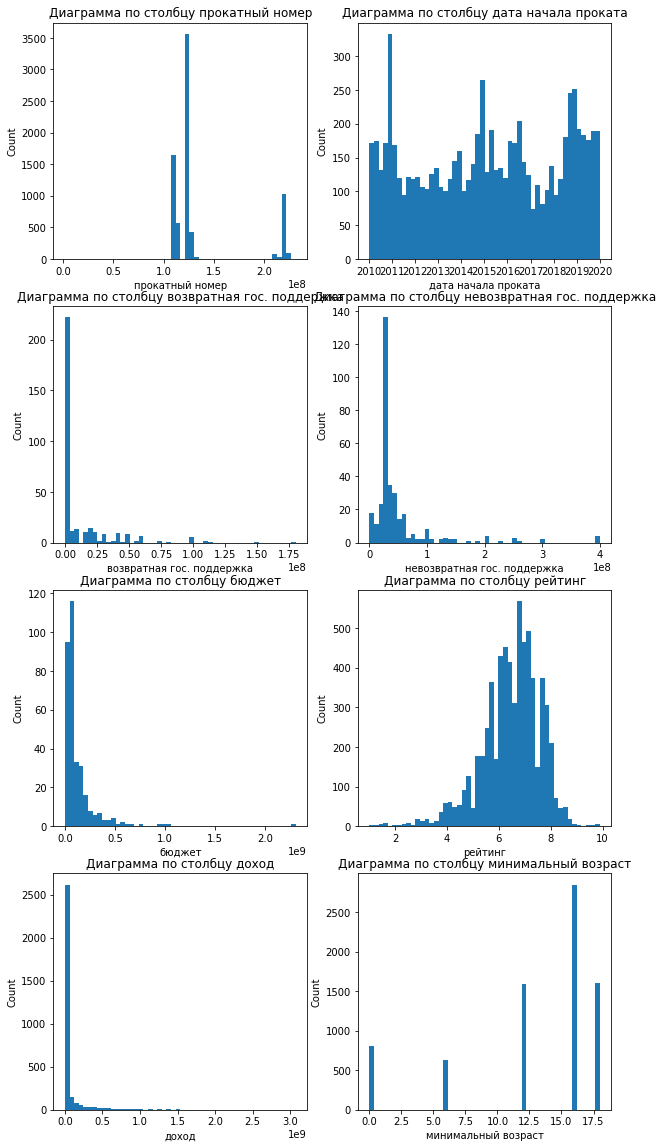

In [44]:
plt.figure(figsize=[10, 20])
for i, column in enumerate(numerical_columns):
    plt.subplot(4,2,i+1)
    plt.hist(data.loc[:, column], bins=50)
    plt.title('Диаграмма по столбцу ' + rus_columns_names[i])
    plt.xlabel(rus_columns_names[i])
    plt.ylabel('Count')
plt.show()

Подозрительно выглядит распределения номеров проката, здесь явно выделяюсь 2 группы номеров. Скорее всего, номер определялся в соответствии с информацией о фильме, и какой-то набор полей отвечал за выбор номера.

По времени распределение вполне естественное, фильмы выходили со схожей интенсивностью в течении всего периода с 2010 по 2019 годы.

Объём возвратных средств имеет пик около нуля, это закономерно, если эти фильмы вообще не получали поддержки от государства  или получали только невозвратные средства.

Объём невозвратных средств имеет пик около 25 млн. руб. что сопоставимо с реальными бюджетами фильмов.

Распределение бюджета также имеет пик около нуля и требует дальнейшего рассмотрения.

Рейтинг распределен вполне естественно, наибольшее количество фильмов имеют рейтинг 4 - 8, очень малая часть выходить за пределы этого рейтинга.

Сборы фильмов также имеют пик около нуля и требуют дальнейшего рассмотрения.

В гистограмме минимального возраста нет ничего выделяющегося.

Информация о прокатном номере:
- Первые три цифры указывают на год выдачи удостоверения.
- Следующие две цифры — это порядковый номер фильма в списке выданных в этом году удостоверений.
- Последние три цифры — это контрольное число, которое рассчитывается по определённому алгоритму.

Проверка гистограммы бюджета фильмов

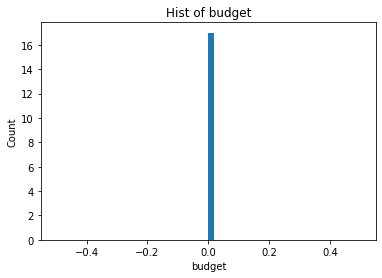

In [45]:
plt.hist(data.loc[data['budget'] < 14000000, 'budget'], bins=50)
plt.title('Hist of ' + 'budget')
plt.xlabel('budget')
plt.ylabel('Count')
plt.show()

Фильмы с нулевым бюджетом это странно, рассмотрим эти строки детальнее

In [46]:
display(data.loc[data['budget'] < 14000000, ['title', 
       'production_country',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'box_office']])

,title,production_country,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office
2052,14+,Россия,0.0,"23,000,000.0",0.0,"Министерство культуры, Фонд кино",6.6,"10,234,016.1"
2057,Дуxless 2,Россия,0.0,"75,000,000.0",0.0,Фонд кино,6.6,"446,163,511.0"
2471,Воин (2015),Россия,"10,000,000.0","70,000,000.0",0.0,Фонд кино,7.8,"196,572,438.4"
2531,Бармен.,Россия,"20,000,000.0",0.0,0.0,Фонд кино,6.2,"67,418,974.8"
2614,Савва. Сердце воина,Россия,"60,000,000.0","100,000,000.0",0.0,Фонд кино,4.6,"184,487,551.4"
2683,Тряпичный союз,Россия,0.0,"59,000,000.0",0.0,Фонд кино,6.3,"1,957,738.5"
2787,Срочно выйду замуж,Россия,0.0,"35,000,000.0",0.0,Фонд кино,5.1,"72,937,783.2"
2873,Помню - не помню!,Россия,0.0,"6,000,000.0",0.0,Министерство культуры,4.3,"15,362,931.4"
3046,Любовь с ограничениями,Россия,"19,000,000.0","51,000,000.0",0.0,Фонд кино,6.3,"70,299,052.0"
3564,Притяжение (2016),Россия,0.0,"250,000,000.0",0.0,Фонд кино,5.6,"1,038,321,489.0"


У всех этих фильмов есть поддержка государства, но нет сведений о бюджет, если считать бюджет равным сумме гос. поддержки, в дальнейшем исказим результат анализа. Поэтому удалим эти данные.

In [47]:
temp = data
print(len(temp))

7481


In [48]:
data = data[data['budget'] != 0]

In [49]:
temp = data
print(len(temp))

7464


Проверка гистограммы

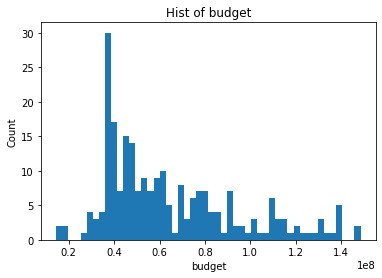

In [50]:
plt.hist(data.loc[data['budget'] < 150000000, 'budget'], bins=50)
plt.title('Hist of ' + 'budget')
plt.xlabel('budget')
plt.ylabel('Count')
plt.show()

Провека гистограммы сборов фильма

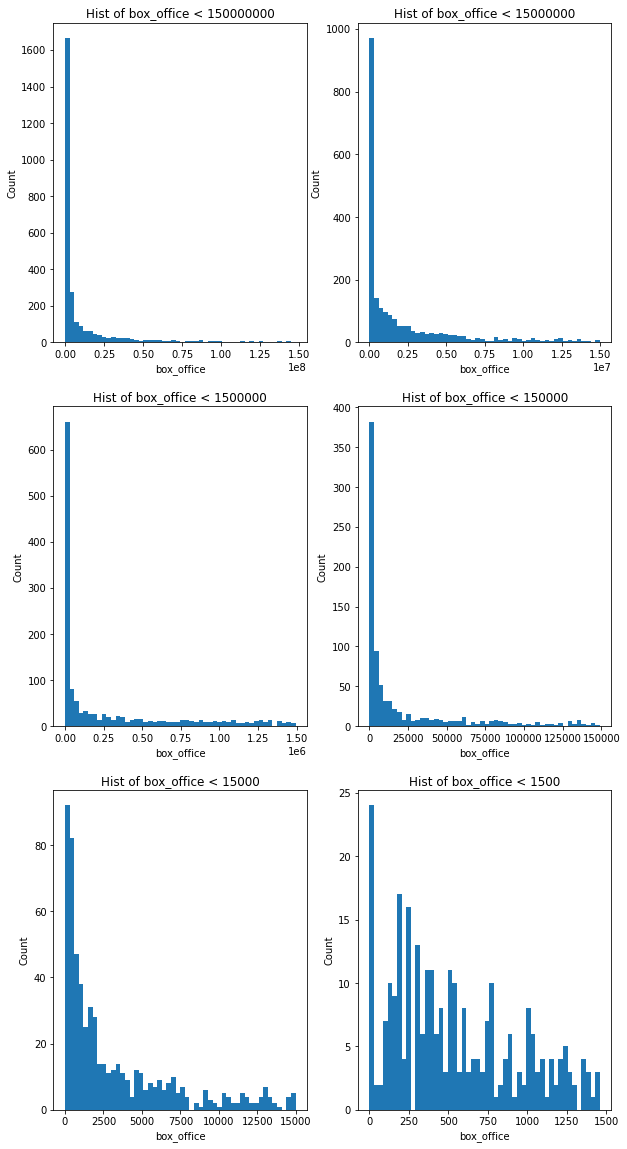

In [51]:
numb_list = [150000000, 15000000, 1500000, 150000, 15000, 1500]
plt.figure(figsize=[10, 20])
for i, threshold in enumerate(numb_list):
    plt.subplot(3,2,i+1)
    plt.hist(data.loc[data['box_office'] < threshold, 'box_office'], bins=50)
    plt.title('Hist of ' + 'box_office' + ' < ' +  str(threshold))
    plt.xlabel('box_office')
    plt.ylabel('Count')
plt.show()

В данных есть фильмы со сборами меньше 1500 рублей. Не будем их удалять, т.к. это сильно повлияет на распределение значений в других столбцах.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

Год начала проката

In [53]:
data['show_start_year'] = data['show_start_date'].apply(lambda x: x.year)

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Функция, обрезающая строку после первой запятой

In [54]:
def get_first_elem(line):
    line = str(line)
    if line.find(',') == -1:
        return line.strip()
    return line.split(',')[0].strip()

Создание новых столбцов

In [55]:
data['main_director'] = data['director'].apply(get_first_elem)
data['main_genre'] = data['genres'].apply(get_first_elem)

In [56]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,min_age,age_description,studio_list,country_list,show_start_year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,7.2,"боевик,драма,мелодрама",NaN,18,запрещено для детей,"[Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикч...",[США],2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,...,6.6,"драма,военный",NaN,6,для детей старше 6 лет,"[Киностудия ""Мосфильм""]",[СССР],2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,6.8,"фантастика,боевик,триллер",NaN,18,запрещено для детей,"[Юниверсал Пикчерз, Кикстарт Продакшнз, Марк П...",[США],2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,6.8,"фантастика,боевик,триллер",NaN,18,запрещено для детей,"[Юниверсал Пикчерз, Кикстарт Продакшнз, Марк П...",[США],2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,6.8,"фантастика,боевик,триллер",NaN,18,запрещено для детей,"[Юниверсал Пикчерз, Кикстарт Продакшнз, Марк П...",[США],2015,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,...,7.7,драма,NaN,6,для детей старше 6 лет,"[Киностудия ""Мосфильм""]",[СССР],2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,...,8.3,"мелодрама,комедия","2,700.0",12,для детей старше 12 лет,"[Киностудия ""Мосфильм""]",[СССР],2013,В.Меньшов,мелодрама
7,Любовь и сигареты,221074614,2014-12-29 12:00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,...,6.6,"мюзикл,мелодрама,комедия",NaN,18,запрещено для детей,"[Юнайтед Артистс, Грин Стрит Филмз, Айкон Инте...",[США],2014,Джон Туртурро,мюзикл
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,...,8.0,"комедия,криминал",NaN,18,запрещено для детей,"[Пульсар Продюксьон, ТФ1 Фильм]",[Франция],2016,Эрик Беснард,комедия
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,...,7.8,"мелодрама,комедия",NaN,12,для детей старше 12 лет,"[Киностудия ""Мосфильм"", Телевидение ВНР]","[СССР, Венгрия]",2014,В.Титов,мелодрама


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [57]:
data['gov_part'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

Вывод данных с новым столбцом

In [58]:
display(data.loc[:, \
                 ['title', 'refundable_support', 'nonrefundable_support', \
                  'budget', 'gov_part']].tail(20))

,title,refundable_support,nonrefundable_support,budget,gov_part
7465,Иван Царевич и Серый Волк 4,"100,000,000.0",0.0,"190,000,000.0",0.5
7466,Жёлтый клевер,NaN,NaN,NaN,NaN
7467,Унесенные ветром,NaN,NaN,NaN,NaN
7468,Нотр-Дам,NaN,NaN,NaN,NaN
7469,Дикие и свободные,NaN,NaN,NaN,NaN
7470,Реальная любовь в Нью-Йорке,NaN,NaN,NaN,NaN
7471,Черное Рождество,NaN,NaN,NaN,NaN
7472,Ходячий замок,NaN,NaN,NaN,NaN
7473,Вторжение,"100,000,000.0","400,000,000.0","944,000,000.0",0.5
7474,Папа,NaN,NaN,NaN,NaN


Промежуточные выводы:
1. В столбцах дата начала проката рейтинг данные хранились в неверном формате. Формат был измененен, а также для столбца с возрастным рейтингов были добавлена 2 дополнительных - с информацией о минимальном возрасте и описанием возрастного рейтинга.
2. В данных были обнаружены пропуски в переменных. Пропуски в качественных переменных не заполнялись, т.к. нет данных для их восстановления. Пропуски в количественных переменных не были заполнены медианой, т.к. часть данных с пропусками составляем существенную часть всех данных и такое заполнение сильно исказит распределение значений.
3. Явные дубликаты не были обнаружены. Во всех категориальных столбцах были устранены неявные дубликаты, связанные с количеством пробелов в начале строки.
4. В большинстве категориальных столбцов обнаружилась проблема, состоящая в разных форматах записи перечисления данных в одной ячейке (например, через запятую или через тире). Для решения этой проблемы в дальнейшем создаются новые столбцы с информацией только о первом значении из ячейки.
5. Были изучены распределения значения в количественных столбцах, не было обнаружено выбросов или других проблем в данных.
6. Были добавлены новые столбцы, содержащие информацию о годе начала проката, а также о главном режиссере и главном жанре.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [59]:
data.groupby('show_start_year')['puNumber'].agg('count')

show_start_year
2010    981
2011    622
2012    593
2013    630
2014    805
2015    699
2016    815
2017    503
2018    887
2019    929
Name: puNumber, dtype: int64

In [60]:
grouped_data = data.groupby('show_start_year')[['puNumber', 'box_office']].agg({'puNumber': 'count', 'box_office':'count'})
grouped_data

,puNumber,box_office
show_start_year,,
2010,981,105
2011,622,109
2012,593,128
2013,630,184
2014,805,278
2015,699,459
2016,815,523
2017,503,355
2018,887,471


Доля фильмов за каждый год, для которых указаны сборы

In [61]:
grouped_data['ratio'] = grouped_data['box_office'] / grouped_data['puNumber']

In [62]:
pd.options.display.float_format = '{:,.3f}'.format
grouped_data

,puNumber,box_office,ratio
show_start_year,,,
2010,981,105,0.107
2011,622,109,0.175
2012,593,128,0.216
2013,630,184,0.292
2014,805,278,0.345
2015,699,459,0.657
2016,815,523,0.642
2017,503,355,0.706
2018,887,471,0.531


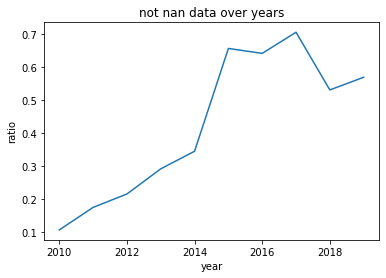

In [63]:
x=list(grouped_data.index)
y=list(grouped_data['ratio'])
#print(x)
#print(y)
plt.plot(x, y)
plt.title('not nan data over years')
plt.xlabel('year')
plt.ylabel('ratio')
plt.show()

In [64]:
pd.options.display.float_format = '{:,.1f}'.format

Наиболее информативными являются 2015 - 2019 годы, для них доля фильмов с данными о сборах выше 0.5

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Данные без пропусков в сумме проката

In [65]:
curr_data = data[~data['box_office'].isna()]

Проверка

In [66]:
grouped_data = curr_data.groupby('show_start_year')[['puNumber', 'box_office']].agg({'puNumber': 'count', 'box_office':'count'})
grouped_data

,puNumber,box_office
show_start_year,,
2010,105,105
2011,109,109
2012,128,128
2013,184,184
2014,278,278
2015,459,459
2016,523,523
2017,355,355
2018,471,471


Пропусков в доходах нет

Суммарный доход фильмов по годам

In [67]:
sum_data = curr_data.groupby('show_start_year')\
['box_office'].agg(['sum', 'count'])
sum_data

,sum,count
show_start_year,,
2010,"2,428,654.0",105
2011,"14,102,765.0",109
2012,"6,955,423.0",128
2013,"29,799,706.2",184
2014,"7,434,717,843.1",278
2015,"38,527,827,199.1",459
2016,"46,742,316,269.5",523
2017,"48,458,147,253.8",355
2018,"49,251,991,405.2",471


График суммарного дохода фильмов по годам

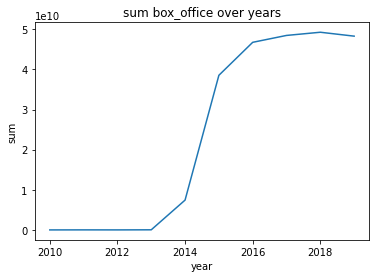

In [68]:
x=list(sum_data.index)
y=list(sum_data['sum'])
plt.plot(x, y)
plt.title('sum box_office over years')
plt.xlabel('year')
plt.ylabel('sum')
plt.show()

Максимальные сборы - в 2018 году

Минимальные сборы - в 2010 году

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

Среднее значение и медиана сборов за каждый год

In [69]:
mean_data = curr_data.groupby('show_start_year')['box_office'].mean()
median_data = curr_data.groupby('show_start_year')['box_office'].median()

Среднее

show_start_year
2010        23,130.0
2011       129,383.2
2012        54,339.2
2013       161,954.9
2014    26,743,589.4
2015    83,938,621.3
2016    89,373,453.7
2017   136,501,823.2
2018   104,568,983.9
2019    91,262,952.7
Name: box_office, dtype: float64

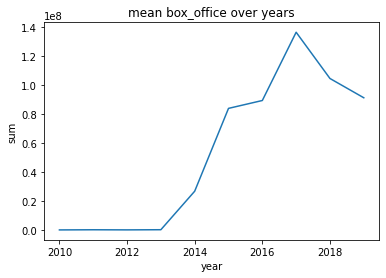

In [70]:
display(mean_data)
x=list(mean_data.index)
y=list(mean_data)
plt.plot(x, y)
plt.title('mean box_office over years')
plt.xlabel('year')
plt.ylabel('sum')
plt.show()

Медиана

show_start_year
2010       1,700.0
2011       3,000.0
2012       5,660.0
2013       3,522.5
2014      18,137.5
2015   4,784,781.5
2016   3,776,087.6
2017   9,919,415.0
2018   8,751,895.8
2019   4,601,033.6
Name: box_office, dtype: float64

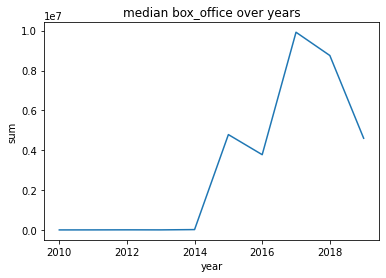

In [71]:
display(median_data)
x=list(median_data.index)
y=list(median_data)
plt.plot(x, y)
plt.title('median box_office over years')
plt.xlabel('year')
plt.ylabel('sum')
plt.show()

In [72]:
display(curr_data.groupby('show_start_year')\
        ['box_office'].agg(['mean', 'median', 'count']))

,mean,median,count
show_start_year,,,
2010,"23,130.0","1,700.0",105
2011,"129,383.2","3,000.0",109
2012,"54,339.2","5,660.0",128
2013,"161,954.9","3,522.5",184
2014,"26,743,589.4","18,137.5",278
2015,"83,938,621.3","4,784,781.5",459
2016,"89,373,453.7","3,776,087.6",523
2017,"136,501,823.2","9,919,415.0",355
2018,"104,568,983.9","8,751,895.8",471


Заметно сильное отличие медианы от среднего - она меньше среднего более, чем в 10 раз. Это означает, что в наших данных преоблагают малобюджетные фильмы.

Посмотрев на средние значения, можем увидеть рост среднего дохода фильма в 2015, 2016 и 2017 годах и снижение дохода в 2018 и 2019 годах. Средние значения доходов фильмов в 2015 и 2019 годах очень близки.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Данные по фильмам за 2015-2019 годы

In [73]:
data20152019 = curr_data[(curr_data['show_start_year'] >= 2015)&\
                         (data['show_start_year'] <= 2019)]

/tmp/ipykernel_895/817336602.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data20152019 = curr_data[(curr_data['show_start_year'] >= 2015)&\


Средний доход фильмов и суммарный доход фильмов за представленный период

In [74]:
display(data20152019.groupby('age_restriction')\
        ['box_office'].agg(['mean', 'sum', 'count']))

,mean,sum,count
age_restriction,,,
«0+» - для любой зрительской аудитории,"8,890,960.7","809,077,426.0",91
«12+» - для детей старше 12 лет,"172,084,608.0","59,369,189,769.5",345
«16+» - для детей старше 16 лет,"93,995,326.6","75,102,265,973.6",799
«18+» - запрещено для детей,"51,526,748.2","40,757,657,833.6",791
«6+» - для детей старше 6 лет,"177,556,890.9","55,220,193,077.9",311


Самой низкой по сборам является категория 0+.

Наилучшие сборы демонстрируют категории фильмов 6+ и 12+.

Самыми многочисленными категориями оказались 16+ и 18+.

In [75]:
display(data20152019.groupby('show_start_year')\
        ['box_office'].agg(['mean', 'sum', 'count']))

,mean,sum,count
show_start_year,,,
2015,"83,938,621.3","38,527,827,199.1",459
2016,"89,373,453.7","46,742,316,269.5",523
2017,"136,501,823.2","48,458,147,253.8",355
2018,"104,568,983.9","49,251,991,405.2",471
2019,"91,262,952.7","48,278,101,953.1",529


Видим, что зрители тратили примерно одну и ту же сумму денег на фильмы с 2016 по 2019 год.

Средний доход по годам рос в 2016 и 2017 годах, затем падал в 2018 и 2019 годах.

Сумма доходов всех фильмов по разным возрастным рейтингам и годам

In [76]:
display(pd.pivot_table(data=data20152019, index='age_restriction',\
               columns='show_start_year', values='box_office', \
                       aggfunc='count'))

show_start_year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,39,41,3,5,3
«12+» - для детей старше 12 лет,72,80,41,67,85
«16+» - для детей старше 16 лет,165,181,120,155,178
«18+» - запрещено для детей,131,151,147,179,183
«6+» - для детей старше 6 лет,52,70,44,65,80


Число фильмов:
1. Чем позже, тем меньше фильмов с рейтингом 0+ выходит.
2. Число фильмов остальных возрастных рейтингов к 2019 выросло по сравнению с 2015
3. В 2017 году сняли заметно меньше фильмов, чем в предыдушем, в 2016 и 2018 и 2019 число снимаемых фильмов росло.

In [77]:
display(pd.pivot_table(data=data20152019, index='age_restriction',\
               columns='show_start_year', values='box_office', \
                       aggfunc='mean'))

show_start_year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,"9,719,348.2","3,664,118.3","76,532,976.7","6,489,800.4","5,915,355.6"
«12+» - для детей старше 12 лет,"186,382,077.4","139,384,526.3","191,498,235.6","212,944,651.7","149,178,809.1"
«16+» - для детей старше 16 лет,"65,343,033.9","91,680,936.4","155,788,257.9","105,021,973.9","71,648,421.3"
«18+» - запрещено для детей,"41,453,058.2","44,992,912.7","65,656,432.5","48,939,025.1","55,310,362.3"
«6+» - для детей старше 6 лет,"163,794,458.1","172,187,800.1","273,432,593.9","152,519,373.8","158,811,772.8"


Средний доход:
1. 0+ - очень сильно вырос в 2017 году (но там все 3 фильма), изменения сложно анализировать, мало данных
2. 12+ - упал к 2016, рос в 2017 и 2018, заметно снизился в 2019. В итоге в 1.5 раза меньше, чем в 2015
3. 16+ - рос в 2016 и 2017, далее падал 2 года. В итоге почти равен доходу в 2015.
4. 18+ - рос в 2016 и 2017, упал в 2018 и почти не изменился в 2019
5. 6+ - рос в 2016 и 2017, далее упал в 2018 и почти не изменился в 2019

In [78]:
display(pd.pivot_table(data=data20152019, index='age_restriction',\
               columns='show_start_year', values='box_office', \
                       aggfunc='sum'))

show_start_year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,"379,054,578.4","150,228,848.7","229,598,930.0","32,449,002.1","17,746,066.8"
«12+» - для детей старше 12 лет,"13,419,509,570.5","11,150,762,104.0","7,851,427,660.7","14,267,291,660.7","12,680,198,773.7"
«16+» - для детей старше 16 лет,"10,781,600,601.3","16,594,249,489.7","18,694,590,951.1","16,278,405,946.9","12,753,418,984.6"
«18+» - запрещено для детей,"5,430,350,628.9","6,793,929,818.9","9,651,495,581.0","8,760,085,501.1","10,121,796,303.6"
«6+» - для детей старше 6 лет,"8,517,311,820.0","12,053,146,008.2","12,031,034,131.0","9,913,759,294.3","12,704,941,824.3"


Суммарные сборы:
1. 0+ - менялся вместе с числом фильмов
2. 12+ - сильно упало количество фильмов, недостаточно вырос доход, суммарный доход снизился на 40%
3. 16+ - в 2016 и 2017 доход рос, затем начал падать вместе со средним сбором
4. 18+ - доход в среднем рос из-за увеличения количества фильмов
5. 6+ - вырос к 2016 году, упал в 2018 и вырос в 2019.

Промежуточные выводы:
1. Была рассчитана доля фильмов с информацией о прокате за каждый год. Наиболее информативным оказался период 2015-2019.
2. Были рассмотрены суммарные сборы фильмов по годам. В 2016 году по сравнению с 2015 сумма выросла на 20%, затем с 2016 по 2019 практически не менялась.
3. Средние сборы фильмов росли с 2014 по 2017 год, далее 2 года подряд падали.
4. Было рассмотрено влияние возрастной категории фильма на его сборы по годам. Меньше всего собирали фильмы с категорией 0+, больше всего заработали фильмы с категориями 6+ и 12+, хотя больше всего фильмов вышло с категориями 16+ и 18+. По годам средние сборы фильмов каждой из категорий менялся в соответствии с тенденциями роста или снижения средних сборов по всем фильмам. То есть отношение средних доходов разных категорий оставалось примерно одним и тем же.
 

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Рассматриваемые данные: с информацией о доходах и государственном финансировании. Пропуски в гос финансировании заполнили нулями.

In [79]:
curr_data = data[(~data['refundable_support'].isna()) | \
                 (~data['nonrefundable_support'].isna()) & \
                 (data['refundable_support'] + data['nonrefundable_support'] > 0) & \
                (~data['box_office'].isna())]

In [80]:
display(curr_data[['title', 'age_restriction', 'refundable_support', \
           'nonrefundable_support', 'budget']].head(20))

,title,age_restriction,refundable_support,nonrefundable_support,budget
1281,Пока еще жива,«16+» - для детей старше 16 лет,0.0,"26,500,000.0","79,411,900.0"
1448,Бесславные придурки,«12+» - для детей старше 12 лет,0.0,"26,000,000.0","37,142,857.0"
1498,Невидимки,«12+» - для детей старше 12 лет,0.0,"107,847,945.0","176,023,490.0"
1524,БЕРЦЫ,«16+» - для детей старше 16 лет,0.0,"28,000,000.0","40,574,140.0"
1792,Братья Ч,«16+» - для детей старше 16 лет,0.0,"25,000,000.0","40,015,122.0"
1853,Тайна Сухаревой башни. Чародей равновесия,«6+» - для детей старше 6 лет,0.0,"25,000,000.0","51,850,000.0"
1869,А зори здесь тихие..._,«12+» - для детей старше 12 лет,"50,000,000.0","100,000,000.0","220,588,394.0"
1870,Две женщины,«12+» - для детей старше 12 лет,0.0,"46,502,299.0","86,210,067.0"
1902,Призрак_.,«6+» - для детей старше 6 лет,0.0,"75,000,000.0","139,551,503.0"
1911,Ведьма .,«16+» - для детей старше 16 лет,0.0,"34,000,000.0","48,571,430.0"


Информация о рассматриваемых данных

In [81]:
curr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1281 to 7477
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  315 non-null    object        
 1   puNumber               315 non-null    int64         
 2   show_start_date        315 non-null    datetime64[ns]
 3   type                   315 non-null    object        
 4   film_studio            315 non-null    object        
 5   production_country     315 non-null    object        
 6   director               315 non-null    object        
 7   producer               313 non-null    object        
 8   age_restriction        315 non-null    object        
 9   refundable_support     315 non-null    float64       
 10  nonrefundable_support  315 non-null    float64       
 11  budget                 315 non-null    float64       
 12  financing_source       315 non-null    object        
 13  r

Проверка наличия пропусков

In [82]:
curr_data[['refundable_support', 'nonrefundable_support', 'budget']].isna().sum()

refundable_support       0
nonrefundable_support    0
budget                   0
dtype: int64

#### Распределение выделяемых средств на поддержку кино

Гистограммы распределения государственного финансирования и бюджета фильмов, а также отношения бюджета к финансированию.

Добавим 3 новых столбца:
- gov_support - сумма инвестиций государства
- payback - коэффициент окупаемости = доход / бюджет (обычно окупается фильм при окупаемости > 2, т.к. кинотеатры забирают себе 50% дохода)
- gov_part - доля государственных денег в бюджете фильма

In [83]:
import warnings
warnings.filterwarnings("ignore")
curr_data['gov_support'] = curr_data['refundable_support'] + curr_data['nonrefundable_support']
curr_data['payback'] = curr_data['box_office'] / curr_data['budget']

<Figure size 432x288 with 0 Axes>

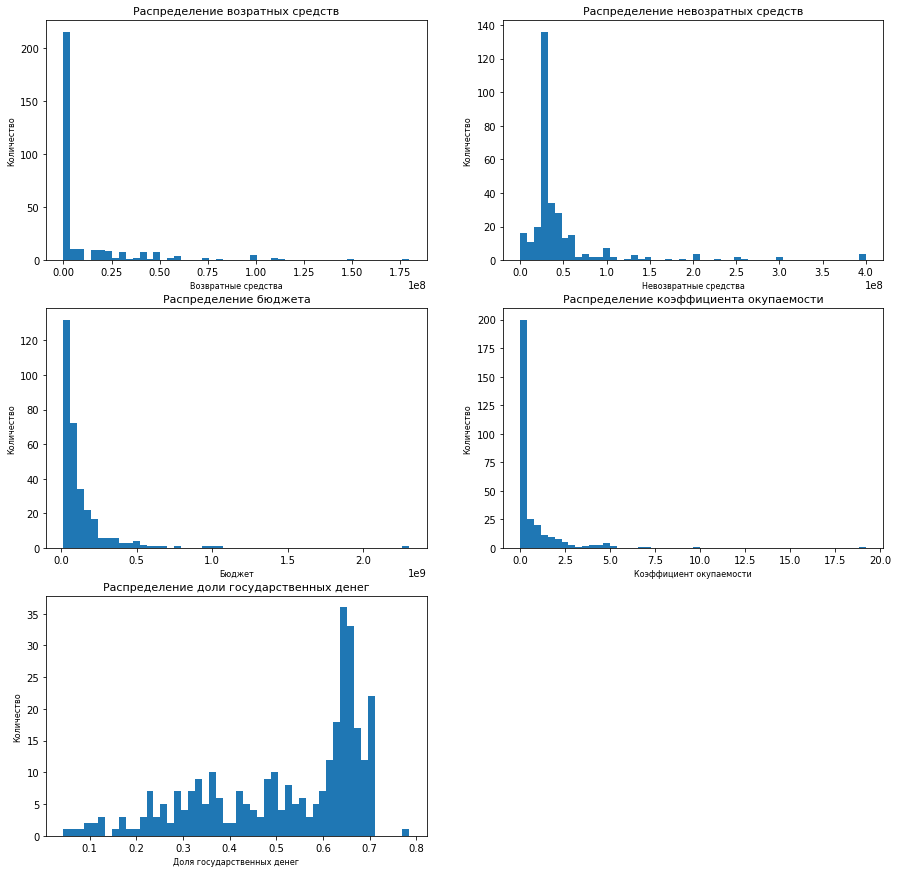

In [84]:
plt.subplots_adjust(wspace=0.5, hspace=0.5);

plt.figure(figsize=[15, 15]);
plt.subplot(3, 2, 1)
plt.hist(curr_data['refundable_support'], bins=50)
plt.title('Распределение возратных средств', fontsize=11)
plt.xlabel('Возвратные средства', fontsize=8)
plt.ylabel('Количество', fontsize=8)
#plt.show()

plt.subplot(3, 2, 2)
plt.hist(curr_data['nonrefundable_support'], bins=50)
plt.title('Распределение невозратных средств', fontsize=11)
plt.xlabel('Невозвратные средства', fontsize=8)
plt.ylabel('Количество', fontsize=8)
#plt.show()

plt.subplot(3, 2, 3)
plt.hist(curr_data['budget'], bins=50)
plt.title('Распределение бюджета', fontsize=11)
plt.xlabel('Бюджет', fontsize=8)
plt.ylabel('Количество', fontsize=8)
#plt.show()

plt.subplot(3, 2, 4)
plt.hist(curr_data['payback'], bins=50)
plt.title('Распределение коэффициента окупаемости', fontsize=11)
plt.xlabel('Коэффициент окупаемости',fontsize=8)
plt.ylabel('Количество', fontsize=8)
#plt.show()

plt.subplot(3, 2, 5)
plt.hist(curr_data['gov_part'], bins=50)
plt.title('Распределение доли государственных денег', fontsize=11)
plt.xlabel('Доля государственных денег', fontsize=8)
plt.ylabel('Количество',fontsize=8)
plt.show()

Отдельно гистограммы наиболее представленных значений для коэффициента окупаемости, бюджета и возвратных средств

Text(0, 0.5, 'Количество')

<Figure size 432x288 with 0 Axes>

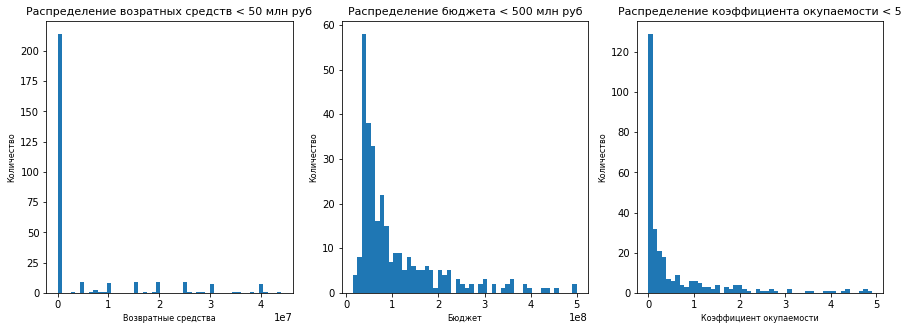

In [85]:
plt.subplots_adjust(wspace=0.3, hspace=0.3);

plt.figure(figsize=[15, 5]);
plt.subplot(1, 3, 1);
plt.hist(curr_data.loc[curr_data['refundable_support'] < 50000000, 'refundable_support'], bins=50);
plt.title('Распределение возратных средств < 50 млн руб', fontsize=11)
plt.xlabel('Возвратные средства', fontsize=8)
plt.ylabel('Количество', fontsize=8)
#plt.show()


plt.subplot(1, 3, 2);
plt.hist(curr_data.loc[curr_data['budget'] < 500000000, 'budget'], bins=50);
plt.title('Распределение бюджета < 500 млн руб', fontsize=11)
plt.xlabel('Бюджет', fontsize=8)
plt.ylabel('Количество', fontsize=8)
#plt.show()

plt.subplot(1, 3, 3);
plt.hist(curr_data.loc[curr_data['payback'] < 5, 'payback'], bins=50);
plt.title('Распределение коэффициента окупаемости < 5', fontsize=11)
plt.xlabel('Коэффициент окупаемости',fontsize=8)
plt.ylabel('Количество', fontsize=8)
#plt.show()

Рассчет статистик 

In [86]:
curr_data[['refundable_support', 'nonrefundable_support', 'budget', 'payback', 'gov_part']].describe()

,refundable_support,nonrefundable_support,budget,payback,gov_part
count,315.0,315.0,315.0,301.0,315.0
mean,"11,603,174.6","48,107,044.0","134,096,082.3",0.8,0.5
std,"25,151,438.8","59,886,140.9","191,226,039.6",1.7,0.2
min,0.0,0.0,"14,462,464.0",0.0,0.0
25%,0.0,"25,000,000.0","46,153,866.5",0.0,0.4
50%,0.0,"30,000,000.0","73,379,554.0",0.1,0.6
75%,"10,000,000.0","40,000,000.0","150,004,286.5",0.8,0.7
max,"180,000,000.0","400,000,000.0","2,305,074,303.0",19.2,0.8


Выводы:
1. Большинство фильмов (более 50% не имеют возвратных средств)
2. Большая часть фильмов имеет бюджет менее 200 млн. руб.
3. Большинство фильмов не окупается
4. В основном доля государственныз денег составляет от 20% до 60% от общего бюджета фильма

#### Распределение по жанрам, какие жанры чаще всего финансирует государство

Количество фильмов каждого из жанров

In [87]:
curr_data['main_genre'].value_counts()

драма          92
комедия        68
мультфильм     26
nan            15
триллер        14
мелодрама      14
фэнтези        11
ужасы          10
фантастика     10
военный         9
приключения     7
семейный        7
боевик          5
детектив        5
мюзикл          4
детский         4
история         4
криминал        3
биография       3
спорт           3
реальное ТВ     1
Name: main_genre, dtype: int64

In [88]:
best_genres = list(curr_data.loc[curr_data['main_genre'] != 'nan', 'main_genre'].value_counts().head(10).index)

#print(best_genres)

new_data = curr_data[(curr_data['main_genre'] != 'nan') & (curr_data['main_genre'].isin(best_genres))]

display(new_data.groupby('main_genre')[['refundable_support', 'nonrefundable_support', \
                                        'budget', 'payback', 'gov_part', 'gov_support']]\
        .agg(refundable_support=('refundable_support', 'mean'), \
             nonrefundable_support=('nonrefundable_support', 'mean'), \
                                        budget=('budget', 'mean'), \
             payback=('payback', 'mean'), \
             gov_part=('gov_part', 'mean'), \
             gov_support=('gov_support', 'mean'), \
             count = ('gov_support', 'count')) \
        .sort_values(by='gov_support', ascending=False))

,refundable_support,nonrefundable_support,budget,payback,gov_part,gov_support,count
main_genre,,,,,,,
фантастика,"19,000,000.0","96,600,000.0","219,310,081.5",0.4,0.4,"115,600,000.0",10
приключения,"36,428,571.4","63,000,000.0","482,106,027.0",0.6,0.4,"99,428,571.4",7
фэнтези,"21,181,818.2","72,718,181.8","212,738,524.1",0.4,0.6,"93,900,000.0",11
мультфильм,"28,461,538.5","45,827,692.3","203,288,441.0",1.0,0.4,"74,289,230.8",26
драма,"6,829,857.4","50,120,214.7","120,129,203.1",0.4,0.5,"56,950,072.1",92
триллер,"7,857,142.9","42,831,806.1","92,211,495.7",0.3,0.6,"50,688,948.9",14
военный,"4,444,444.4","42,444,540.7","142,878,536.1",0.9,0.4,"46,888,985.1",9
комедия,"10,772,058.8","33,099,749.2","86,993,924.7",1.5,0.5,"43,871,808.0",68
ужасы,"11,100,000.0","24,400,000.0","56,387,762.5",1.1,0.6,"35,500,000.0",10


Можем, видеть, что в среднем государство наиболее интенсивно спонсирует жанры фантастики и фэнтези, при этом с окупаемостью  у этих жанров есть явные проблемы

Наиболее успешными (по показателю окупаемости) являются мультфильмы и комедии, которые являются одними из самых многочисленных.

#### Рейтинг фильмов, финансируемых государством. Корелляция суммы/процента финансирования и рейтинга/доходов фильма.

Рассчет корреляций 
- суммы финансирования
- процента государственных денег в бюджете фильма
- рейтинга фильма
- доходов фильма
- коэффициента окупаемости

In [89]:
curr_data[['gov_support', 'gov_part', 'ratings', 'box_office', 'payback']].corr()

,gov_support,gov_part,ratings,box_office,payback
gov_support,1.0,0.1,0.1,0.5,0.1
gov_part,0.1,1.0,-0.0,-0.1,-0.1
ratings,0.1,-0.0,1.0,0.1,0.1
box_office,0.5,-0.1,0.1,1.0,0.8
payback,0.1,-0.1,0.1,0.8,1.0


Большинство величин коррелируют очень слабо. Можем выделить
- Сумма государственного финансирования положительно коррелирует с доходом фильма (корреляция = 0.5)
- Доход фильма сильно коррелирует с окупаемостью, что в целом логично, т.к. в числителе стоит доход
- Рейтиг фильма очень слабо коррелирует с денежными характеристиками фильма

#### Рассмотреть окупаемость таких фильмов, т.е. отношение бюджета и сборов. 

Средняя окупаемость и медиана окупаемости

Окупаемость = сборы / бюджет

In [90]:
print("Средняя окупаемость = ", curr_data['payback'].mean())
print("Медиана окупаемости = ", curr_data['payback'].median())

Средняя окупаемость =  0.7633099908958417
Медиана окупаемости =  0.1486638202078148


Более половины фильмов не собирают в кинотеатрах даже четверти своего бюджета

Выводим информацию о 20 фильмах, лучших по значению окупаемости

In [91]:
display(curr_data[['title', 'budget', 'payback', \
                   'box_office', 'gov_support', 'main_genre', \
                   'ratings', 'director', 'producer']]\
        .sort_values(by='payback', ascending=False).head(20))

,title,budget,payback,box_office,gov_support,main_genre,ratings,director,producer
7455,Холоп,"160,000,000.0",19.2,"3,073,568,690.8","60,000,000.0",комедия,6.8,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие..."
5707,Лёд,"148,585,222.0",9.7,"1,445,731,797.9","85,000,000.0",nan,NaN,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс..."
5748,Я худею,"87,649,127.0",7.2,"633,462,266.7","30,000,000.0",комедия,6.9,А.Черномазов (псевдоним Алексей Нужный),"С.Корнихин, Н.Куликов, А.Черномазов, А.Кремер,..."
3228,"Гуляй, Вася !","39,000,000.0",6.6,"259,099,078.0","25,345,000.0",комедия,6.5,Р.Каримов,"А.Новиков, А.Котелевский, Э.Илоян, Д.Жалинский..."
2700,Самый Лучший День,"130,619,336.0",5.2,"683,029,061.4","63,000,000.0",комедия,4.7,А.Першин (псевдоним Ж.Крыжовников),"Т.Бекмамбетов, А.Першин (псевдоним Ж.Крыжовник..."
2204,8 новых свиданий,"77,401,751.0",5.1,"393,344,626.3","30,000,000.0",комедия,6.0,М.Бальчюнас,"ООО ""Грин Филмс"", ООО ""ПЦ ""Горад"""
5640,Ёлки Новые,"174,381,922.0",4.9,"855,451,052.0","100,000,000.0",комедия,5.8,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...","Т.Бекмамбетов, Г.Стрижевская"
6177,Непрощенный,"82,496,889.0",4.8,"393,279,629.4","40,000,000.0",драма,6.7,С.Андреасян,"С.Андреасян, Г.Андреасян, А.Ананикян"
5652,Движение вверх,"590,192,191.0",4.7,"2,779,686,144.0","400,000,000.0",спорт,7.5,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ..."
5504,Последний богатырь,"352,477,575.0",4.7,"1,655,037,688.0","100,000,000.0",комедия,6.8,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо"


В 20 лучших по окупаемости фильмах находятся:
- 10 комедий
- 3 драмы
- 2 мультфильма
Как уже говорилось, комедии и мультфильмы - самые окупаемые жанры для финансируемых государством фильмов.

#### Выявить режиссеров и продюсеров, картины которых финансируют чаще всего. Среди них выделить наиболее успешных.

Добавим столбец с главным продюсером

Сортируем по количеству упоминания в качестве главного режиссера

In [92]:
curr_data.groupby('main_director')[['gov_support', 'ratings', 'box_office', 'payback', 'gov_part']]\
.agg(gov_support=('gov_support', 'mean'), \
     ratings=('ratings', 'mean'), \
     box_office=('box_office', 'mean'), \
    payback=('payback', 'mean'), \
    gov_part=('gov_part', 'mean'), \
    count=('gov_part', 'count')).sort_values(by='count', ascending=False).head(20)

,gov_support,ratings,box_office,payback,gov_part,count
main_director,,,,,,
Р.Давлетьяров,"91,969,589.0",6.8,"59,852,586.5",0.3,0.6,5
Д.Дьяченко,"87,750,000.0",5.7,"601,224,658.5",2.6,0.5,4
С.Андреасян,"81,250,000.0",6.0,"227,607,549.6",1.7,0.4,4
А.Цицилин,"116,666,666.7",6.3,"176,775,316.4",0.6,0.4,3
Д.Шмидт,"71,666,666.7",6.2,"470,825,212.3",2.4,0.3,3
С.Мокрицкий,"67,503,333.3",6.6,"201,988,143.0",1.4,0.4,3
К.Шипенко,"104,000,000.0",6.8,"1,275,924,072.6",6.9,0.5,3
А.Котт,"43,000,000.0",5.8,"1,157,678.4",0.0,0.6,3
А.Аксененко,"30,000,000.0",5.3,"70,909,606.5",0.9,0.4,3


Хотим проверить сколько раз они входят в список всех режиссеров (не только как главный). 

(Я знаю, что в pandas всё можно сделать через встроенные команды и без циклов, но другого варианта я не придумал)

In [93]:
pd.options.display.float_format = '{:,.3f}'.format
directors = list(curr_data['main_director'].unique())
fields = ['gov_support', 'ratings', 'box_office', 'payback', 'gov_part']
data_dict = {}
indexes = curr_data.index
for field in fields:
    data_dict[field] = [0 for director in directors]
data_dict['count'] = [0 for director in directors]
for i, director in enumerate(directors):
    for ind in indexes:
        curr_cell = curr_data.loc[ind, 'director']
        if director in curr_cell:
            for field in fields:
                data_dict[field][i] += curr_data.loc[ind, field]
            data_dict['count'][i] += 1
for field in fields:
    for i, director in enumerate(directors):
        data_dict[field][i] /= data_dict['count'][i]

new_df = pd.DataFrame(data=data_dict, index=directors)

display(new_df.sort_values(by='count', ascending=False).head(20))    

,gov_support,ratings,box_office,payback,gov_part,count
С.Андреасян,"69,000,000.000",5.800,"194,538,212.398",1.791,0.444,5
Р.Давлетьяров,"91,969,589.000",6.780,"59,852,586.488",0.297,0.574,5
А.Котт,"75,800,000.000",5.820,"202,676,309.640",1.074,0.581,5
Д.Дьяченко,"87,750,000.000",5.650,"601,224,658.530",2.590,0.509,4
А.Карпиловский,"51,250,000.000",6.075,"214,177,944.500",1.234,0.575,4
К.Шипенко,"104,000,000.000",6.833,"1,275,924,072.597",6.921,0.453,3
Н.Меркулова,"34,500,000.000",6.500,"40,902,822.667",0.502,0.496,3
А.Пармас,"51,666,666.667",6.333,"273,806,550.090",2.302,0.578,3
А.Аксененко,"30,000,000.000",5.300,"70,909,606.533",0.853,0.398,3
С.Мокрицкий,"67,503,333.333",6.600,"201,988,142.983",1.363,0.431,3


Почти ничего не поменялось

Можем выявить наиболее успешных режиссеров (по средней окупаемости их фильмов) среди 20 наиболее часто финансируемых:
- С. Адреасян (окупаемость 1.8)
- Д. Дьяченко (окупаемость 2.6)
- А. Пармас (окупаемость 2.3)
- К. Шипенко (окупаемость 6.9)

(Просто пример)

In [94]:
pd.options.display.float_format = '{:,.1f}'.format

#### Исследовать, какие возрастные категории фильмов государство финансирует чаще всего

In [95]:
display(curr_data.groupby('age_restriction')\
        [['gov_support', 'ratings', 'box_office', 'payback', 'gov_part']]\
.agg(gov_support=('gov_support', 'mean'), \
     ratings=('ratings', 'mean'), \
     box_office=('box_office', 'mean'), \
    payback=('payback', 'mean'), \
    gov_part=('gov_part', 'mean'), \
    count=('gov_part', 'count')).sort_values(by='count', ascending=False)\
        .head(20))

,gov_support,ratings,box_office,payback,gov_part,count
age_restriction,,,,,,
«16+» - для детей старше 16 лет,"44,415,706.1",6.0,"59,431,512.8",0.6,0.5,118
«12+» - для детей старше 12 лет,"72,460,137.5",6.0,"192,862,957.7",1.0,0.5,103
«6+» - для детей старше 6 лет,"82,667,872.6",6.0,"217,043,626.7",0.9,0.5,59
«18+» - запрещено для детей,"35,309,143.7",6.3,"20,674,110.8",0.2,0.5,27
«0+» - для любой зрительской аудитории,"34,190,000.0",6.4,"110,586,550.5",0.4,0.4,8


Наиболее часто финансируемый возрастный рейтинг - 16+

Наиболее финансируемый возрастной рейтинг - 6+

При этом в среднем наиболее окупаемый - 12+

Средний рейтинг - примерно один и тот же

Государство заполняем примерно половину бюджета для всех возрастных рейтингов

Промежуточные выводы
1. Было рассмотрено распределение средств, выделяемых на поддержку кино, рассчитаны окупаемость и доля государственных денег от общего бюджета фильма. Было показано, что большинство таких фильмов не окупается.
2. Было рассмотрено распределение государственного финансирования по жанрам. Наиболее частко окупаются жанры комедия и мультфильм, хотя больше всего государство инвестирует в фантистику, приключение и фэнтези, которые окупаются менее, чем наполовину.
3. Были рассмотрены корреляции государственного финансирования, рейтинга и доходов фильма. Оказалось, что сумма гос. финансирования положительно коррелирует с доходом фильма (корреляция 0.5), рейтинг фильма очень слабо коррелирует с финансовыми характеристиками фильма.
4. Были выявлены режиссеры, фильмы которых окупаются лучше всего. Ими оказались, С. Адреасян (окупаемость 1.8), Д. Дьяченко (окупаемость 2.6), А. Пармас (окупаемость 2.3), К. Шипенко (окупаемость 6.9).
5. Была исследована зависимость государственного финансирования и возрастного рейтинга. Больше всего государство финансирует фильмы с рейтингами 6+ и 12+, они я являются наиболее окупаемыми.

### Шаг 5. Напишите общий вывод

1. Пропуски в данных были оставлены без изменений, т.к. данные без нужно информации не будут использоваться в анализе, а заполнение их, например, нулями, только исказит результаты анализа наших данных.


2. Были изменены некоторые типы данные, удалены некоторые дубликаты, добавлены новые столбцы для главного режиссера и главного жанра, для которых и был проведен дальнейший анализ.


3. Была рассчитана доля фильмов с информацией о прокате за каждый год. Для анализа был выбран период 2015-2019, т.к. именно для этого периода имеется больше всего данных о доходах фильмов. 


4. Было выявлено, что в этот период сумма сборов за год менялась очень слабо, то есть зрители тратили почти одну и ту же сумму каждый год на походы в кино. 


5. Средний доход фильмов увеличивался в 2016 и в 2017 года, затем падал в 2018 и 2019 годах. Средние значения дохода 2015 и 2019 годов оказались очень близки. Похожую тенденцию мы наблюдали для большинства возрастных групп фильмов.


6. Были рассчитаны суммарные и средние сборы фильмов для каждой из возрастных категорий за 2015-2019 годы. Число фильмов всех возрастный рейтингов, кроме 0+, выросло в 2016, 2018 и 2019 и упало в 2017. Это соотносится с противоположными изменениями среднего дохода фильма при фиксированной общем доходе.


7. Было проведено исследование фильмов, получающих государственное финансирование. Было выявлено, что:
- В среднем эти фильмы не окупаются
- Наибольшее государственное финансирование получаются фильмы жанров фантастика и фэнтези, хотя наиболее часто окупаются комедии и мультфильмы
- Сумма государственно финансирования положительно коррелирует с доходом фильма (корреляция = 0.5)
- Рейтинг фильма слабо коррелирует с его финансовыми показателями
- Наиболее часто окупаются фильмы режиссеров С. Андреасяна, Д. Дьяченко, А. Пармаса, К. Шипенко.
- Самое большое финансирование получают фильмы возрастного рейтинга 6+, хотя чаще всего окупаются фильмы с рейтингом 12+ (они окупаются на 30% чаще)